The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Loaded 1158 objects from nodes.h5
Loaded 2267 objects from ships.h5
Loaded 1528 objects from nodes-test.h5


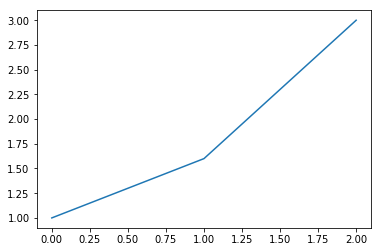

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot([1,1.6,3])
import constants as c
import database as db
import numpy as np
import pandas as pd

from util import get_closest
%load_ext autoreload
%autoreload 2


nodes = db.load_list(c.NODES_FILENAME)
ships = db.load_list(c.SHIPS_FILENAME)
tnodes = db.load_list(c.TEST_NODES_FILENAME)

In [80]:
s = {0: 0, 1: 0, -1: 0}
for node in tnodes:
    #print(node.uncertainty)
    counts = np.unique(node.uncertainty, return_counts=True)
    
    for i in range(0, len(counts[0])):
        s[counts[0][i]] = s[counts[0][i]] + counts[1][i]

        total = np.fromiter(s.values(), dtype=int).sum()
print(s, total)

for v in s.values():
    print(v/total)
    

{0: 67391, 1: 30866, -1: 818} 99075
0.6802018672722685
0.31154176129195055
0.008256371435780974


In [85]:
a=0
b=0
for node in tnodes:
    #print(node.uncertainty)
    for i in range(0, len(node.uncertainty)):
        if node.uncertainty[i] == -1:
            if node.label[i]:
                a += 1
            else:
                b += 1
print(a,b)
s=a+b
a/s

416 402


0.508557457212714

In [85]:
import pandas as pd
a = []
b=[]
c=[]
for n in nodes:
    if n.reach_k > 0:
        a.append(n.reach_percentage())
        b.append(n.reach_k)
        c.append(n.alpha)
df=pd.DataFrame(np.array([a,b,c]).T.reshape(-1, 3), columns=["Reach %", "K", "alpha"])

df.corr()
#plt.plot(b,c, 'bo')
#plt.hist(a)

,Reach %,K,alpha
Reach %,1.000000,0.556928,-0.429322
K,0.556928,1.000000,-0.261936
alpha,-0.429322,-0.261936,1.000000


In [23]:
#n = nodes[100]
#n.draw()
n.get_features()

[[ 1.9135333  -1.3076064   0.22361125 ... -1.23487103 -1.1835983
   1.94080795]
 [ 3.51617295  3.55163387  1.64597995 ...  4.72228199  3.866573
   4.80698855]]


array([[ 1.9135333 ,  3.51617295],
       [-1.3076064 ,  3.55163387],
       [ 0.22361125,  1.64597995],
       ...,
       [-1.23487103,  4.72228199],
       [-1.1835983 ,  3.866573  ],
       [ 1.94080795,  4.80698855]])

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
from map import Map
#ship = ships[4]
import cartopy.crs as ccrs

#Map.plot_route(ship.xyt[0], ship.xyt[1])
Map.draw()#.set_extent([1800100, 3400100, 7600100, 8800100], crs=ccrs.Mercator())
#Map.draw_area(c.MEAS_AREA, 'green')
#print(ship.detect_passages())
# 167 µs per loop
#%timeit ship.detect_passages()

In [ ]:
#tests and visualizations
    # reach %-score map
    # reach
        # conf matrix + scores
            # with and wihout k optimization
        # map of recall and sensitivity by nodes
    # path
        # accuracy graphs

In [36]:

import route

node = get_closest(nodes, 10000, 6555000)
#print(len(node.passages))
p = node.passages[12]
xy = np.array((p.x, p.y))
#(95, 105)
#10000 loops, best of 5: 20.4 µs per loop

%timeit route.route_in_area(xy)
#for p in node.passages:
#    print(route.route_in_area(p.x, p.y))


100000 loops, best of 5: 6.46 µs per loop


In [86]:
from constants import MEAS_AREA 

def route2(xy):
    enters_i = False
    x = xy[0]
    y = xy[1]

    b = ((xy[0] > MEAS_AREA[0]) & (xy[0] < MEAS_AREA[1]) &
         (xy[1] > MEAS_AREA[2]) & (xy[1] < MEAS_AREA[3]))

    for i in range(0, len(x) - 1):
        if b[i]:

            if enters_i is False:
                enters_i = i

        elif enters_i is not False:
            return enters_i, i

    if enters_i is not False:
        return enters_i, len(x) - 1
    else:
        return False

%timeit route2(xy)



The slowest run took 4.98 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 12.2 µs per loop


(95, 105)

Loaded 2138 objects from nodes.h5
0.3476190476190476
210
0.6523809523809523


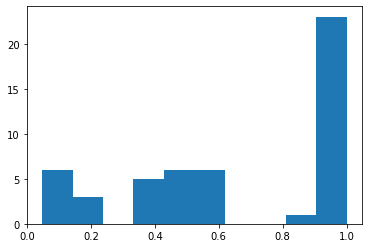

[0.09523809523809523, 1.0, 1.0, 0.38095238095238093, 0.8095238095238095, 0.38095238095238093, 0.19047619047619047, 1.0, 0.42857142857142855, 0.5238095238095238, 0.47619047619047616, 0.047619047619047616, 0.5238095238095238, 0.5238095238095238, 1.0, 1.0, 0.5238095238095238, 0.47619047619047616, 0.19047619047619047, 0.09523809523809523, 0.09523809523809523, 1.0, 0.47619047619047616, 0.14285714285714285, 1.0, 1.0, 0.42857142857142855, 1.0, 0.47619047619047616, 0.09523809523809523, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5714285714285714, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.09523809523809523, 0.3333333333333333, 1.0, 1.0, 0.5238095238095238, 0.3333333333333333, 1.0, 0.38095238095238093]
(0.6523809523809523, 0.5517279720533469, 0.7530339327085577)
(0.5517279720533469, 0.7530339327085577)


In [14]:
import random
import numpy as np
import scipy
import matplotlib.pyplot as plt
import constants as c

from node import Node
from database import load_list
from map import Map
from predict import predict_going

nodes = load_list(c.NODES_FILENAME)

n = nodes[601]

def pick_random_passage(node, n):

	labeleds = [i for i in range(0, len(node.label))]
	size = len(labeleds) if len(labeleds) < n else n

	return random.sample(labeleds, size)

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

import scipy.stats as st

n.draw()
print(n.rp)

#Map.draw()

print(len(n.passages))
means = []
for p in pick_random_passage(n, 50):
	route = n.get_route(p)

	means.append(predict_going(nodes, route[0], route[1]))

print(np.mean(means))
plt.hist(means)

plt.show()
print(means)
print(mean_confidence_interval(means))
print(st.t.interval(0.95, len(means)-1, loc=np.mean(means), scale=st.sem(means)))

Loaded 2138 objects from nodes.h5
[ 47 116  17  26  21 142  75  49  90 198 155 196 159 113 103 122 104 204
  23 157 120 195 138]
A
[0.8695652173913043, 0.8695652173913043, 0.8695652173913043, 0.6521739130434783, 0.8695652173913043, 0.6956521739130435, 0.8260869565217391, 0.8260869565217391, 0.8695652173913043, 0.782608695652174, 0.7391304347826086, 0.8695652173913043, 0.8260869565217391, 0.782608695652174, 0.9130434782608695, 0.6956521739130435, 0.6521739130434783, 0.8695652173913043, 0.9565217391304348, 0.782608695652174, 0.6521739130434783, 0.782608695652174, 0.8260869565217391, 0.782608695652174, 0.9565217391304348, 0.8695652173913043, 1.0, 0.782608695652174, 0.9130434782608695, 0.9130434782608695, 0.9130434782608695, 0.8695652173913043, 0.8695652173913043, 0.6956521739130435, 0.9565217391304348, 0.8695652173913043, 0.8695652173913043, 0.8260869565217391, 0.8260869565217391, 0.9130434782608695, 0.8695652173913043, 0.6956521739130435, 0.8260869565217391, 0.8695652173913043, 0.6521739

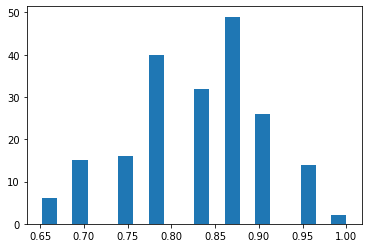

In [11]:
import random
import numpy as np
import scipy
import matplotlib.pyplot as plt
import constants as c

from node import Node
from database import load_list
from map import Map
from predict import predict_going, going_preprocess
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors

nodes = load_list(c.NODES_FILENAME)

n = nodes[601]

def pick_random_passage(node, n):

	labeleds = [i for i in range(0, len(node.label))]
	size = len(labeleds) if len(labeleds) < n else n

	return random.sample(labeleds, size)

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

n.draw()
#print(n.rp)

#Map.draw()

#print(len(n.passages))
means = []
#for p in pick_random_passage(n, 50):
p = pick_random_passage(n, 1)[0]
route = n.get_route(p)
x_train, x_test, labels, k = going_preprocess(nodes, route[0], route[1])
nearest = NearestNeighbors(n_neighbors=k)
nearest.fit(x_train)
dists, neighbors_id = nearest.kneighbors(x_test)
print(neighbors_id[0])
print("A")
for i in range(0, 200):
	means.append(np.mean(np.random.choice(labels[neighbors_id[0]], n.reach_k)))
	


print(means)
print(mean_confidence_interval(means, 0.9))
print(np.mean(means))
plt.hist(means, 20)
plt.show()

# toimiiko mean_confidence_interval oikein, testaa arr = [0.2, 0.6, 8]